In [168]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = './NANUMGOTHIC.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)



%matplotlib inline


In [169]:
df=pd.read_csv('./2017kbo.csv')
df.head()

,Date,구장,원정팀,원정팀점수,홈팀점수,홈팀,원정팀결과,홈팀결과,비고
0,2017-03-14 13:00,대전,LG,9,9,한화,무,무,시범경기
1,2017-03-14 13:00,대구,KT,9,1,삼성,승,패,시범경기
2,2017-03-14 13:00,광주,두산,4,7,기아,패,승,시범경기
3,2017-03-14 13:00,사직,SK,3,2,롯데,승,패,시범경기
4,2017-03-14 13:00,마산,넥센,2,2,NC,무,무,시범경기


In [245]:
count = pd.DataFrame(data=np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]),
index= ['Win', 'Draw','Lose','Winning rate'],
columns=['종합','광주','잠실','대구','문학','마산','사직','대전','수원','고척'])
count

,종합,광주,잠실,대구,문학,마산,사직,대전,수원,고척
Win,0,0,0,0,0,0,0,0,0,0
Draw,0,0,0,0,0,0,0,0,0,0
Lose,0,0,0,0,0,0,0,0,0,0
Winning rate,0,0,0,0,0,0,0,0,0,0


In [246]:

for i in range(60,780):
    if df.iloc[i]['원정팀']=='기아' :
        if df.iloc[i]['원정팀결과']=='승':
            count.iloc[0][df.iloc[i]['구장']]+=1
            count.iloc[0]['종합']+=1
        elif df.iloc[i]['원정팀결과']=='무':
            count.iloc[1][df.iloc[i]['구장']]+=1
            count.iloc[1]['종합']+=1
        else :
            count.iloc[2][df.iloc[i]['구장']]+=1
            count.iloc[2]['종합']+=1
    if df.iloc[i]['구장']=='광주':
        if df.iloc[i]['홈팀결과']=='승':
            count.iloc[0][df.iloc[i]['구장']]+=1
            count.iloc[0]['종합']+=1
        elif df.iloc[i]['홈팀결과']=='무':
            count.iloc[1][df.iloc[i]['구장']]+=1
            count.iloc[1]['종합']+=1
        else :
            count.iloc[2][df.iloc[i]['구장']]+=1
            count.iloc[2]['종합']+=1
for i in range(0,10):
    count.iloc[3][i]=(count.iloc[0][i])/(count.iloc[0][i]+count.iloc[2][i])*100.0
count

,종합,광주,잠실,대구,문학,마산,사직,대전,수원,고척
Win,87,45,7,5,4,3,7,6,5,5
Draw,1,0,1,0,0,0,0,0,0,0
Lose,56,27,8,3,4,5,1,2,3,3
Winning rate,60,62,46,62,50,37,87,75,62,62


Text(0.5, 1.0, '구장 별 승률')

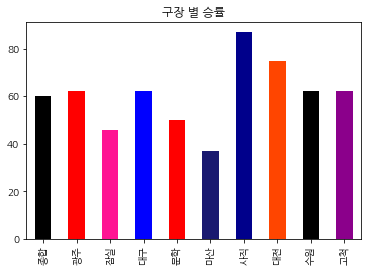

In [263]:
labels = ['종합','광주','잠실','대구','문학','마산','사직','대전','수원','고척']
count.iloc[3].plot.bar(color=['black','red','DeepPink', 'blue', 'red','MidnightBlue', 'DarkBlue','OrangeRed','Black','DarkMagenta'])
plt.title("구장 별 승률")

In [258]:
score = pd.DataFrame(data=np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]),
index= ['Win', 'Draw','Lose','Win avg','Lose avg'],
columns=['종합','광주','잠실','대구','문학','마산','사직','대전','수원','고척'])
score

,종합,광주,잠실,대구,문학,마산,사직,대전,수원,고척
Win,0,0,0,0,0,0,0,0,0,0
Draw,0,0,0,0,0,0,0,0,0,0
Lose,0,0,0,0,0,0,0,0,0,0
Win avg,0,0,0,0,0,0,0,0,0,0
Lose avg,0,0,0,0,0,0,0,0,0,0


In [259]:
for i in range(60,780):
    if df.iloc[i]['원정팀']=='기아' :
        if df.iloc[i]['원정팀결과']=='승':
            score.iloc[0][df.iloc[i]['구장']]+=df.iloc[i]['원정팀점수']
            score.iloc[0]['종합']+=df.iloc[i]['원정팀점수']
        elif df.iloc[i]['원정팀결과']=='무':
            score.iloc[1][df.iloc[i]['구장']]+=df.iloc[i]['원정팀점수']
            score.iloc[1]['종합']+=df.iloc[i]['원정팀점수']
        else :
            score.iloc[2][df.iloc[i]['구장']]+=df.iloc[i]['원정팀점수']
            score.iloc[2]['종합']+=df.iloc[i]['원정팀점수']
    if df.iloc[i]['구장']=='광주':
        if df.iloc[i]['홈팀결과']=='승':
            score.iloc[0][df.iloc[i]['구장']]+=df.iloc[i]['홈팀점수']
            score.iloc[0]['종합']+=df.iloc[i]['홈팀점수']
        elif df.iloc[i]['홈팀결과']=='무':
            score.iloc[1][df.iloc[i]['구장']]+=df.iloc[i]['홈팀점수']
            score.iloc[1]['종합']+=df.iloc[i]['홈팀점수']
        else :
            score.iloc[2][df.iloc[i]['구장']]+=df.iloc[i]['홈팀점수']
            score.iloc[2]['종합']+=df.iloc[i]['홈팀점수']
for i in range(0,10):
    score.iloc[3][i]=score.iloc[0][i]/count.iloc[0][i]
    score.iloc[4][i]=score.iloc[2][i]/count.iloc[2][i]
score

,종합,광주,잠실,대구,문학,마산,사직,대전,수원,고척
Win,711,382,52,44,31,27,47,49,49,30
Draw,3,0,3,0,0,0,0,0,0,0
Lose,192,86,16,9,32,19,3,6,11,10
Win avg,8,8,7,8,7,9,6,8,9,6
Lose avg,3,3,2,3,8,3,3,3,3,3


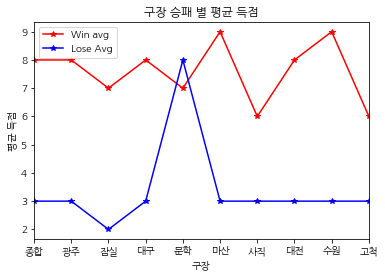

In [261]:
score.iloc[3].plot(color='red',marker='*')
score.iloc[4].plot(color='blue',marker='*')
plt.title("구장 승패 별 평균 득점")
plt.xlabel("구장")
plt.ylabel("평균 득점")
plt.legend(['Win avg','Lose Avg'])